In [26]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import json

In [9]:
# API URL
URL = "http://localhost:8080/api/intent?sentence="

# Test using sample phrase
phrase = URL + "Je voudrais manger au restaurant ce soir"
r = requests.get(url = phrase)
  
# Extracting data in json format
data = r.json() 
  
# Printing the output 
print("Results :\n", data) 

Results :
 {'find-train': 0.003149856347590685, 'irrelevant': 0.16539081931114197, 'find-flight': 0.0028878021985292435, 'find-restaurant': 0.7818630337715149, 'purchase': 0.010286014527082443, 'find-around-me': 0.003812880488112569, 'provide-showtimes': 0.02780276909470558, 'find-hotel': 0.004806765355169773}


Il existe 8 catégories différentes pour la classifications des intentions dans le modèle proposé :
- find-train : Trouver un train
- irrelevant : Non pertinent
- find-flight : Trouver un vol
- find-restaurant : Trouver un restaurant
- purchase : Trouver des renseignements concernant un achat (prix, disponibilité, etc...) ou Trouver un article 
- find-around-me : Trouver un lieu faisant une activité autour de soi (ou d'une zone donnée dans la requête)
- provide-showtimes : Trouver des informations pour un film
- find-hotel : Trouver un hotel

Performances du modele actuel :
LOSS      P       R       F1
0.015   0.883   0.665   0.758

In [22]:
# Reading training data
with open('../data/processed/training_set.json') as f:
  trainingData = json.load(f)

# Sentence example
print(trainingData[0])

{'intent': 'irrelevant', 'sentence': '850€ maximum pour le loyer, à partir de janvier si possible'}


Item for each intent :
 {'find-train': 143, 'find-flight': 142, 'find-restaurant': 469, 'purchase': 613, 'find-around-me': 383, 'provide-showtimes': 117, 'find-hotel': 316, 'irrelevant': 3852}
Total number of items :  6035


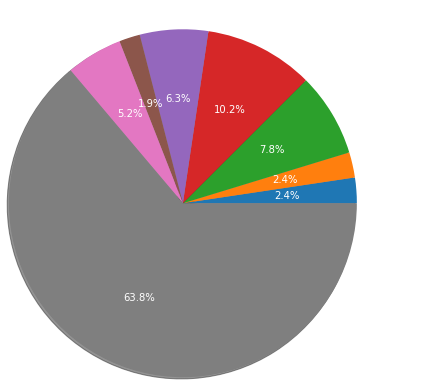

In [50]:
#Counting items in classes
classes = {"find-train":0,
           "find-flight":0,
           "find-restaurant":0,
           "purchase":0,
           "find-around-me":0,
           "provide-showtimes":0,
           "find-hotel":0,
           "irrelevant":0}

for i in range(len(trainingData)):
    intent = trainingData[i]['intent']
    classes[intent] = classes.get(intent, 0) + 1

print("Item for each intent :\n", classes)
print("Total number of items : ", len(trainingData))

#Distribution plot
classesProp = [x/len(trainingData) for x in classes.values()]

plt.rcParams['text.color'] = 'white'
plt.pie(classesProp, labels=classes.keys(), autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

On peut voir sur le graphique ci-dessus que les intents ne sont pas du tout correctement distribués dans le training data. Par conséquent le modèle entraîné va être biaisé et ne marchera pas optimalement.

In [ ]:
#METRIQUES A FAIRE
#(Precision, Recall, Fbeta score, AUC-ROC, matrice de confusion)